# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        
        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0824 01:40:49.970554 10064 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0824 01:40:49.971550 10064 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0824 01:40:50.014652 10064 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 01:40:50.015650 10064 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instea

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0824 01:40:50.313562 10064 deprecation.py:323] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.4260 - acc: 0.1090 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.3041 - acc: 0.0983 - val_loss: 2.3042 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.3045 - acc: 0.0994 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3040 - acc: 0.0986 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.3045 - acc: 0.0994 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.3042 - acc: 0.0992 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3044 - acc: 0.0991 - val_loss: 2.3042 - val

50000/50000 [==============================] - 6s 128us/step - loss: 1.6000 - acc: 0.4315 - val_loss: 1.5959 - val_acc: 0.4277
Epoch 3/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5031 - acc: 0.4675 - val_loss: 1.5241 - val_acc: 0.4528
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4397 - acc: 0.4889 - val_loss: 1.4382 - val_acc: 0.4892
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3987 - acc: 0.5044 - val_loss: 1.5118 - val_acc: 0.4538
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3648 - acc: 0.5170 - val_loss: 1.4159 - val_acc: 0.4915
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.3175 - acc: 0.5303 - val_loss: 1.4777 - val_acc: 0.4767
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.2871 - acc: 0.5415 - val_loss: 1.4780 - val_acc: 0.4796
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 113us/step - loss: 1.7222 - acc: 0.3971 - val_loss: 1.6986 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6635 - acc: 0.4175 - val_loss: 1.6478 - val_acc: 0.4168
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6162 - acc: 0.4329 - val_loss: 1.6050 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5744 - acc: 0.4486 - val_loss: 1.5778 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5382 - acc: 0.4611 - val_loss: 1.5469 - val_acc: 0.4558
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5084 - acc: 0.4708 - val_loss: 1.5293 - val_acc: 0.4602
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4800 - acc: 0.4801 - val_loss: 1.4949 - val_acc: 0.4717
Epoch 10/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 50us/step - loss: 1.9898 - acc: 0.3030 - val_loss: 1.9705 - val_acc: 0.3117
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.9490 - acc: 0.3169 - val_loss: 1.9355 - val_acc: 0.3209
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9173 - acc: 0.3286 - val_loss: 1.9070 - val_acc: 0.3309
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8915 - acc: 0.3392 - val_loss: 1.8844 - val_acc: 0.3388
Epoch 8/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8697 - acc: 0.3478 - val_loss: 1.8650 - val_acc: 0.3445
Epoch 9/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8512 - acc: 0.3550 - val_loss: 1.8476 - val_acc: 0.3534
Epoch 10/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8352 - acc: 0.3617 - val_loss: 1.8347 - val_acc: 0.3620
Epoch 11/50
50000/50000 [==========================

Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2090 - acc: 0.2092 - val_loss: 2.2027 - val_acc: 0.2102
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1962 - acc: 0.2159 - val_loss: 2.1904 - val_acc: 0.2153
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1843 - acc: 0.2211 - val_loss: 2.1789 - val_acc: 0.2210
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1730 - acc: 0.2240 - val_loss: 2.1681 - val_acc: 0.2231
Epoch 10/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1623 - acc: 0.2286 - val_loss: 2.1577 - val_acc: 0.2273
Epoch 11/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1520 - acc: 0.2329 - val_loss: 2.1476 - val_acc: 0.2318
Epoch 12/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1419 - acc: 0.2380 - val_loss: 2.1376 - val_acc: 0.2368
Epoch 13/50
50000/50000 [=============

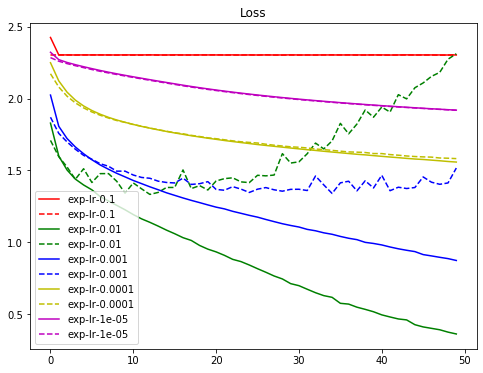

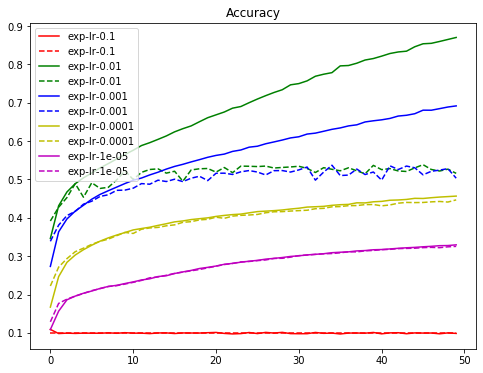

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()